# Importando librerías

In [1]:
import os
import warnings
import random


import pandas as pd
import numpy as np
import pandas as pd
import prince
import pprint
from sklearn.cluster import DBSCAN
from tabulate import tabulate
from sklearn.preprocessing import StandardScaler
from kmodes.kprototypes import KPrototypes
from imblearn.under_sampling import RandomUnderSampler
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split


warnings.filterwarnings('ignore')

# Lectura de datos

In [2]:
path = 'data/'
file = 'muestraDatosFullLimpiosUniviariado.csv'
df = pd.read_csv(path+file, index_col=0)
df.head()

,index,Unnamed: 0,Id_Afiliado,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Unnamed: 0.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1,TipoIdentificacion_datos,...,Discapacidad_datos,Etnia_datos,NivelEducativo_datos,TipoIdentificacion_idFalsos,Regimen,Condicion_Cronica_idSalud,NivelRiesgo_idSalud,Discapacidad_idSalud,Etnia_idSalud,NivelEducativo_idSalud
0,5163688,5163688,6511137.0,3427938,3427938,3428411,3429070,3429070,3429070,TI,...,NaN,NaN,NaN,TI,CONTRIBUTIVO,SIN CONDICION,SIN CONDICION CRONICA,SIN DISCAPACIDAD,NINGUNA DE LAS ANTERIORES,NINGUNO
1,481890,481890,607914.0,1715757,1715757,1715992,1716315,1716315,1716315,CC,...,NaN,NaN,NaN,CC,CONTRIBUTIVO,SIN CONDICION,SIN CONDICION CRONICA,SIN DISCAPACIDAD,NINGUNA DE LAS ANTERIORES,BASICA SECUNDARIA
2,1617671,1617671,2039742.0,5751448,5751448,5752000,5752796,5752796,5752796,RC,...,NaN,NaN,NaN,RC,SUBSIDIADO,SIN CONDICION,SIN CONDICION CRONICA,SIN DISCAPACIDAD,NINGUNA DE LAS ANTERIORES,NINGUNO
3,4594758,4594758,5794516.0,3395522,3395522,3395995,3396651,3396651,3396651,TI,...,NaN,NaN,NaN,TI,CONTRIBUTIVO,SIN CONDICION,SIN CONDICION CRONICA,SIN DISCAPACIDAD,NINGUNA DE LAS ANTERIORES,NINGUNO
4,2537788,2537788,3200242.0,3431598,3431598,3432071,3432730,3432730,3432730,TI,...,NaN,NaN,NaN,TI,CONTRIBUTIVO,SIN CONDICION,SIN CONDICION CRONICA,SIN DISCAPACIDAD,NINGUNA DE LAS ANTERIORES,NINGUNO


# Limpieza de datos

In [3]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

print(df.shape)

df = df.drop(columns=['TipoIdentificacion_datos', 'Nombre', 'Apellido 1', 'Apellido 2', 'idFalso', 'Regimen', 'Telfono celular Nacional',
       'Telfono celular (Cabecera Mpal)',
       'Telfono celular (Centro Poblado y Rural)',
       'Computador de escritorio Nacional',
       'Computador de escritorio (Cabecera Mpal)',
       'Computador de escritorio (Centro Poblado y Rural)',
       'Computador porttil Nacional', 'Computador porttil (Cabecera Mpal)',
       'Computador porttil (Centro Poblado y Rural)', 'Tableta Nacional',
       'Tableta (Cabecera Mpal)', 'Tableta (Centro Poblado y Rural)',
       'Otros dispositivos Nacional', 'Otros dispositivos (Cabecera Mpal)',
       'Otros dispositivos (Centro Poblado y Rural)', 'TELEFONO', 'CorreoElectronico', 'CodigoDane', 'TipoIdentificacion_idFalsos', 'Condicion_Cronica_datos',
       'NivelRiesgo_datos', 'Discapacidad_datos', 'Etnia_datos',
       'NivelEducativo_datos'])

print(df.columns)

df.head()

(1044692, 71)
Index(['index', 'Id_Afiliado', 'FechaNacimiento', 'Genero', 'TipoAfiliado',
       'Regionales', 'Zonales', 'Departamento', 'Municipios', 'Zonas',
       'REGIMEN', 'AfilidoPAC', 'Edades', 'Generacion', 'PQRS 2020',
       'Multiquejoso', 'PortalWeb 2020', 'APP 2020', 'CallCenter 2020',
       'OAA 2020', 'AsesorAClic 2020', 'ViveDigital 2020', 'IVR 2020',
       'ChatEnLinea', 'Digitalizacion generacion', 'categoriaNivelDePQRS',
       'categoriaNivelDeUsoPortalWeb', 'categoriaNivelDeUsoAPP',
       'categoriaNivelDeUsoCallCenter', 'categoriaNivelDeUsoOAA',
       'categoriaNivelDeUsoAsesorAClic', 'categoriaNivelDeUsoChatEnLinea',
       'categoriaNivelDeUsoIVR', 'digitalizacionOficial', 'mujerEnEdadFertil',
       'categoriaNivelDeDigitalizacionOficial', 'Condicion_Cronica_idSalud',
       'NivelRiesgo_idSalud', 'Discapacidad_idSalud', 'Etnia_idSalud',
       'NivelEducativo_idSalud'],
      dtype='object')


,index,Id_Afiliado,FechaNacimiento,Genero,TipoAfiliado,Regionales,Zonales,Departamento,Municipios,Zonas,...,categoriaNivelDeUsoChatEnLinea,categoriaNivelDeUsoIVR,digitalizacionOficial,mujerEnEdadFertil,categoriaNivelDeDigitalizacionOficial,Condicion_Cronica_idSalud,NivelRiesgo_idSalud,Discapacidad_idSalud,Etnia_idSalud,NivelEducativo_idSalud
0,5163688,6511137.0,05/07/2011,F,BENEFICIARIO,R BOGOTA,BOGOTA,DISTRITO CAPITAL,"BOGOTA, D.C.",Metropolitano Bogota,...,BAJO,BAJO,0.0,NO,BAJO,SIN CONDICION,SIN CONDICION CRONICA,SIN DISCAPACIDAD,NINGUNA DE LAS ANTERIORES,NINGUNO
1,481890,607914.0,02/10/1972,F,COTIZANTE,R BOGOTA,BOGOTA,DISTRITO CAPITAL,"BOGOTA, D.C.",Metropolitano Bogota,...,BAJO,MEDIO,0.0,NO,BAJO,SIN CONDICION,SIN CONDICION CRONICA,SIN DISCAPACIDAD,NINGUNA DE LAS ANTERIORES,BASICA SECUNDARIA
2,1617671,2039742.0,27/08/2016,F,BENEFICIARIO,R BOGOTA,BOGOTA,DISTRITO CAPITAL,"BOGOTA, D.C.",Metropolitano Bogota,...,BAJO,BAJO,0.0,NO,BAJO,SIN CONDICION,SIN CONDICION CRONICA,SIN DISCAPACIDAD,NINGUNA DE LAS ANTERIORES,NINGUNO
3,4594758,5794516.0,17/07/2012,F,BENEFICIARIO,R BOGOTA,BOGOTA,DISTRITO CAPITAL,"BOGOTA, D.C.",Metropolitano Bogota,...,BAJO,BAJO,0.0,NO,BAJO,SIN CONDICION,SIN CONDICION CRONICA,SIN DISCAPACIDAD,NINGUNA DE LAS ANTERIORES,NINGUNO
4,2537788,3200242.0,15/09/2009,F,BENEFICIARIO,R BOGOTA,BOGOTA,DISTRITO CAPITAL,"BOGOTA, D.C.",Metropolitano Bogota,...,BAJO,BAJO,0.0,NO,BAJO,SIN CONDICION,SIN CONDICION CRONICA,SIN DISCAPACIDAD,NINGUNA DE LAS ANTERIORES,NINGUNO


# Descriptivos

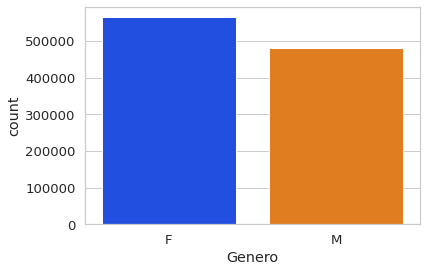

F    564497
M    480195
Name: Genero, dtype: int64


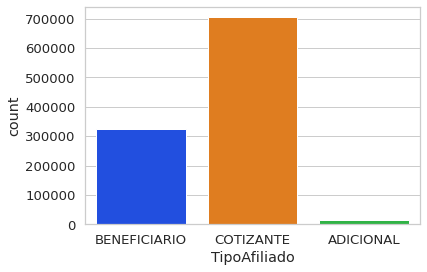

COTIZANTE       704503
BENEFICIARIO    324046
ADICIONAL        16143
Name: TipoAfiliado, dtype: int64


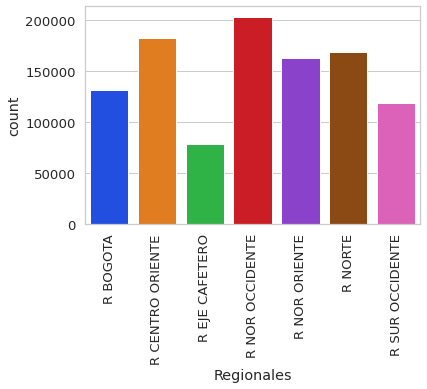

R NOR OCCIDENTE     202918
R CENTRO ORIENTE    181905
R NORTE             168773
R NOR ORIENTE       162853
R BOGOTA            131575
R SUR OCCIDENTE     118081
R EJE CAFETERO       78587
Name: Regionales, dtype: int64


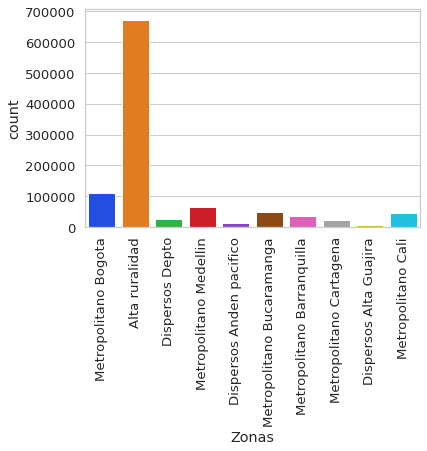

Alta ruralidad                673171
Metropolitano Bogota          108908
Metropolitano Medellin         64952
Metropolitano Bucaramanga      47174
Metropolitano Cali             46226
Metropolitano Barranquilla     36682
Dispersos Depto                26565
Metropolitano Cartagena        20634
Dispersos Anden pacifico       13241
Dispersos Alta Guajira          7139
Name: Zonas, dtype: int64


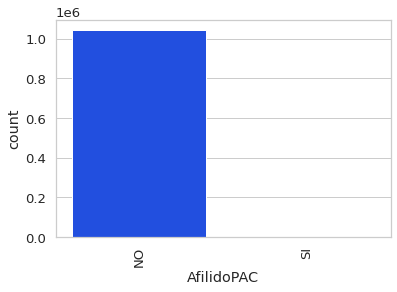

NO    1043279
SI       1413
Name: AfilidoPAC, dtype: int64


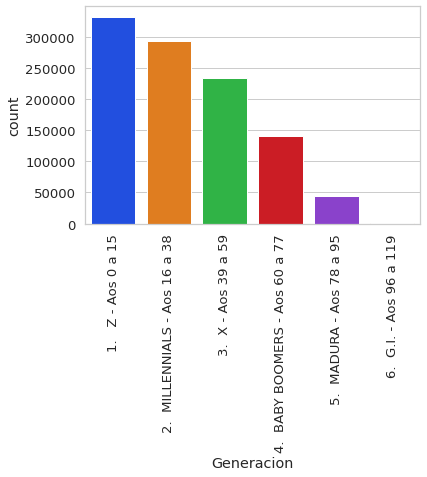

1.   Z - Aos 0 a 15               332021
2.  MILLENNIALS - Aos 16 a 38     293019
3.  X - Aos 39 a 59               232832
4.  BABY BOOMERS - Aos 60 a 77    140184
5.  MADURA - Aos 78 a 95           45041
6.  G.I. - Aos 96 a 119             1595
Name: Generacion, dtype: int64


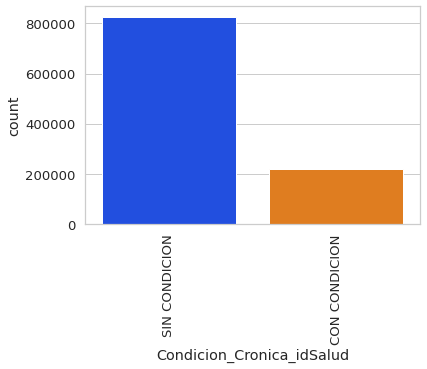

SIN CONDICION    826918
CON CONDICION    217774
Name: Condicion_Cronica_idSalud, dtype: int64


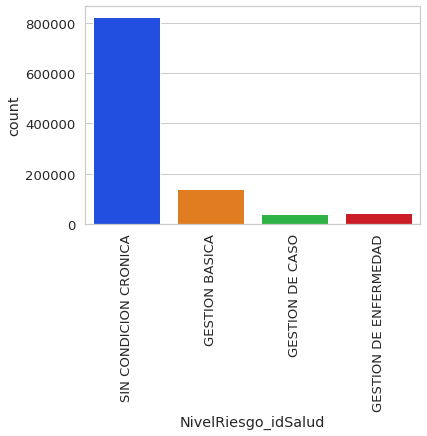

SIN CONDICION CRONICA    826918
GESTION BASICA           139364
GESTION DE ENFERMEDAD     41658
GESTION DE CASO           36752
Name: NivelRiesgo_idSalud, dtype: int64


In [122]:
# barplot of Genero
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Genero', data=df)
plt.show()
print(df['Genero'].value_counts())


# barplot of TipoAfiliado
sns.countplot(x='TipoAfiliado', data=df)
plt.show()
print(df['TipoAfiliado'].value_counts())

# barplot of Regionales
sns.countplot(x='Regionales', data=df)
plt.xticks(rotation=90)
plt.show()
print(df['Regionales'].value_counts())

# barplot of Zonas
sns.countplot(x='Zonas', data=df)
plt.xticks(rotation=90)
plt.show()
print(df['Zonas'].value_counts())

# barplot of AfilidoPAC
sns.countplot(x='AfilidoPAC', data=df)
plt.xticks(rotation=90)
plt.show()
print(df['AfilidoPAC'].value_counts())

# barplot of Generacion
sns.countplot(x='Generacion', data=df)
plt.xticks(rotation=90)
plt.show()
print(df['Generacion'].value_counts())

# barplot of Condicion_Cronica_idSalud
sns.countplot(x='Condicion_Cronica_idSalud', data=df)
plt.xticks(rotation=90)
plt.show()
print(df['Condicion_Cronica_idSalud'].value_counts())

# barplot of NivelRiesgo_idSalud
sns.countplot(x='NivelRiesgo_idSalud', data=df)
plt.xticks(rotation=90)
plt.show()
print(df['NivelRiesgo_idSalud'].value_counts())



# AD hoc con muestra estratificada

In [47]:
# df_adhoc = df.sample(n=1000, random_state=42)
# df_adhoc = df_adhoc.reset_index(drop=True)
# df_adhoc.head()

df_adhoc, df_test = train_test_split(df, test_size=0.9, random_state=42, stratify=df[['Genero', 'TipoAfiliado', 'Regionales', 'REGIMEN']])
df_adhoc = df_adhoc.dropna()
df_adhoc = df_adhoc.reset_index(drop=True)
df_adhoc.shape

(74840, 41)

# DBSCAN con variables originales sin PCA

## Escalado de datos numéricos y codificación de variables categóricas

In [12]:
df_numerical = df_adhoc[['Edades','PQRS 2020',
       'PortalWeb 2020', 'APP 2020', 'CallCenter 2020',
       'OAA 2020', 'AsesorAClic 2020', 'ViveDigital 2020', 'IVR 2020',
       'ChatEnLinea']]
df_numerical.head()

scaler = StandardScaler()
df_numerical_scaled = scaler.fit_transform(df_numerical)
df_numerical_scaled = pd.DataFrame(df_numerical_scaled, columns=df_numerical.columns)
df_numerical_scaled.head()

df_categorical = df_adhoc[['Genero', 'TipoAfiliado', 'Regionales', 'Departamento',
       'Municipios', 'Zonas', 'REGIMEN', 'AfilidoPAC', 'Multiquejoso', 'mujerEnEdadFertil',
       'categoriaNivelDeDigitalizacionOficial', 'Condicion_Cronica_idSalud',
       'NivelRiesgo_idSalud', 'Discapacidad_idSalud', 'Etnia_idSalud',
       'NivelEducativo_idSalud']]
df_categorical.head()

df_categorical = pd.get_dummies(df_categorical, drop_first=True)
df_categorical.head()

,Genero_M,TipoAfiliado_BENEFICIARIO,TipoAfiliado_COTIZANTE,Regionales_R CENTRO ORIENTE,Regionales_R EJE CAFETERO,Regionales_R NOR OCCIDENTE,Regionales_R NOR ORIENTE,Regionales_R NORTE,Regionales_R SUR OCCIDENTE,Departamento_ANTIOQUIA,...,NivelEducativo_idSalud_ESPECIALIZACION,NivelEducativo_idSalud_MAESTRIA,NivelEducativo_idSalud_MEDIA ACADEMICA O CLASICA,NivelEducativo_idSalud_MEDIA TECNICA (BACHILLERATO TECNICO),NivelEducativo_idSalud_NINGUNO,NivelEducativo_idSalud_NORMALISTA,NivelEducativo_idSalud_PREESCOLAR,NivelEducativo_idSalud_PROFESIONAL,NivelEducativo_idSalud_TECNICA PROFESIONAL,NivelEducativo_idSalud_TECNOLOGICA
312050,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
477408,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
641335,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
982286,1,0,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
578353,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [13]:
df_new = pd.concat([df_numerical_scaled, df_categorical], axis=1)
df_new = df_new.dropna()
df_new.head()

,Edades,PQRS 2020,PortalWeb 2020,APP 2020,CallCenter 2020,OAA 2020,AsesorAClic 2020,ViveDigital 2020,IVR 2020,ChatEnLinea,...,NivelEducativo_idSalud_ESPECIALIZACION,NivelEducativo_idSalud_MAESTRIA,NivelEducativo_idSalud_MEDIA ACADEMICA O CLASICA,NivelEducativo_idSalud_MEDIA TECNICA (BACHILLERATO TECNICO),NivelEducativo_idSalud_NINGUNO,NivelEducativo_idSalud_NORMALISTA,NivelEducativo_idSalud_PREESCOLAR,NivelEducativo_idSalud_PROFESIONAL,NivelEducativo_idSalud_TECNICA PROFESIONAL,NivelEducativo_idSalud_TECNOLOGICA
944,-1.429714,-0.112044,-0.159196,-0.132867,-0.199444,-0.302256,-0.031455,-0.021102,-0.198939,-0.146253,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1231,1.038611,-0.112044,-0.159196,-0.132867,-0.199444,-0.302256,-0.031455,-0.021102,-0.198939,-0.146253,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1870,0.283001,-0.112044,7.150973,-0.132867,-0.199444,-0.302256,-0.031455,-0.021102,-0.198939,-0.146253,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2236,-0.674105,-0.112044,-0.159196,-0.132867,-0.199444,-0.302256,-0.031455,-0.021102,-0.198939,-0.146253,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2849,-0.925975,-0.112044,1.668346,-0.132867,-0.199444,-0.302256,-0.031455,-0.021102,-0.198939,-0.146253,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## Elbow

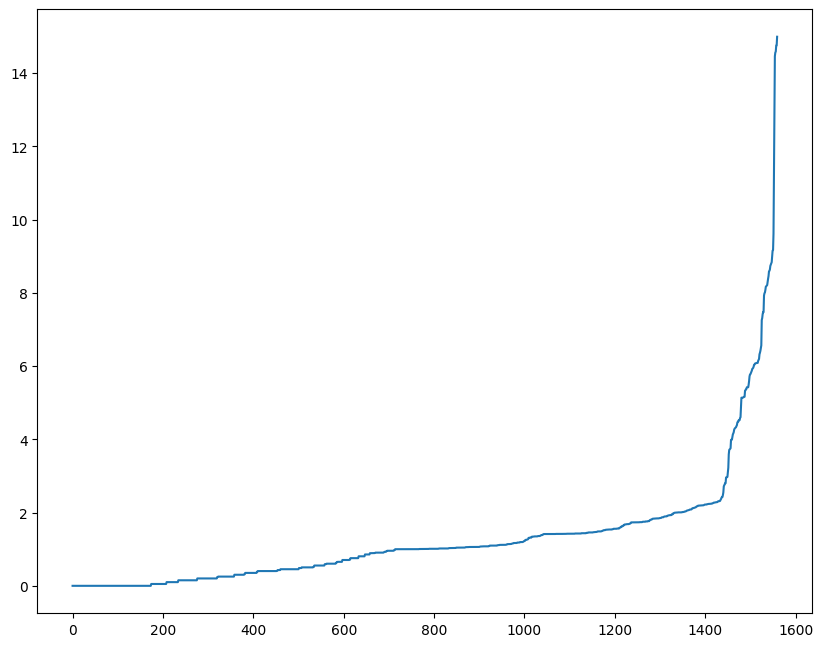

In [14]:
neigh = NearestNeighbors(n_neighbors = 10)
nbrs = neigh.fit(df_new)
distancias, indices = nbrs.kneighbors(df_new)
distancias = np.sort(distancias.flatten())
fig=plt.figure(figsize=(10,8), dpi= 100, facecolor='w', edgecolor='k')
plt.plot(distancias)

In [15]:
i = np.arange(len(distancias))
knee = KneeLocator(i, distancias, S=1, curve='convex', direction='increasing', interp_method='polynomial')
print(distancias[knee.knee])

2.0838324966519925


In [17]:
db = DBSCAN(eps = distancias[knee.knee], min_samples=4)
clusters_std = db.fit_predict(df_new)

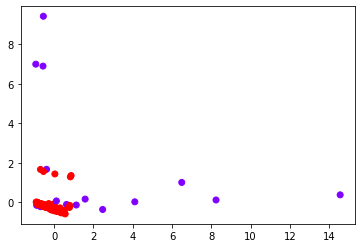

In [18]:
pca = PCA(n_components=2)

cPrincipales=pca.fit_transform(df_new)
cPrincipalesDF = pd.DataFrame(data = cPrincipales, columns = ['ComponentePrincipal1', 'ComponentePrincipal2'])
plt.scatter(cPrincipalesDF['ComponentePrincipal1'], cPrincipalesDF['ComponentePrincipal2'], c = clusters_std, cmap='rainbow')
plt.show()

## Silueta

In [19]:
silhouette_score(df_new, clusters_std)

0.5882670702924124

# K-prototipos

## Elbow

In [131]:
df_numerical = df_adhoc[['Edades','PQRS 2020',
       'PortalWeb 2020', 'APP 2020', 'CallCenter 2020',
       'OAA 2020', 'AsesorAClic 2020', 'ViveDigital 2020', 'IVR 2020',
       'ChatEnLinea']]
df_numerical.head()

scaler = StandardScaler()
df_numerical_scaled = scaler.fit_transform(df_numerical)
df_numerical_scaled = pd.DataFrame(df_numerical_scaled, columns=df_numerical.columns)
df_numerical_scaled.head()

df_categorical = df_adhoc[['Genero', 'TipoAfiliado', 'Regionales', 'Departamento',
       'Municipios', 'Zonas', 'REGIMEN', 'AfilidoPAC', 'Multiquejoso', 'mujerEnEdadFertil',
       'categoriaNivelDeDigitalizacionOficial', 'Condicion_Cronica_idSalud',
       'NivelRiesgo_idSalud', 'Discapacidad_idSalud', 'Etnia_idSalud',
       'NivelEducativo_idSalud']]
df_categorical.head()

df_categorical = pd.get_dummies(df_categorical, drop_first=True)
df_new = pd.concat([df_numerical_scaled, df_categorical], axis=1)
df_new.head()

,Edades,PQRS 2020,PortalWeb 2020,APP 2020,CallCenter 2020,OAA 2020,AsesorAClic 2020,ViveDigital 2020,IVR 2020,ChatEnLinea,...,NivelEducativo_idSalud_BASICA SECUNDARIA,NivelEducativo_idSalud_ESPECIALIZACION,NivelEducativo_idSalud_MEDIA ACADEMICA O CLASICA,NivelEducativo_idSalud_MEDIA TECNICA (BACHILLERATO TECNICO),NivelEducativo_idSalud_NINGUNO,NivelEducativo_idSalud_NORMALISTA,NivelEducativo_idSalud_PREESCOLAR,NivelEducativo_idSalud_PROFESIONAL,NivelEducativo_idSalud_TECNICA PROFESIONAL,NivelEducativo_idSalud_TECNOLOGICA
0,-0.453263,-0.121377,-0.126568,-0.139927,-0.253019,-0.276456,0.0,0.0,-0.20076,-0.16088,...,0,0,0,0,1,0,0,0,0,0
1,-0.689584,-0.121377,-0.126568,-0.139927,0.698179,-0.276456,0.0,0.0,-0.20076,-0.16088,...,0,0,0,0,1,0,0,0,0,0
2,0.216312,-0.121377,-0.126568,-0.139927,-0.253019,-0.276456,0.0,0.0,-0.20076,-0.16088,...,0,0,0,0,0,0,0,0,0,0
3,0.137539,-0.121377,-0.126568,-0.139927,-0.253019,-0.276456,0.0,0.0,-0.20076,-0.16088,...,1,0,0,0,0,0,0,0,0,0
4,-0.807745,-0.121377,-0.126568,-0.139927,-0.253019,-0.276456,0.0,0.0,-0.20076,-0.16088,...,0,0,0,0,1,0,0,0,0,0


In [132]:
X = df_new.copy()

smart_array = X.values
smart_array[:, 0] = smart_array[:,0].astype(float)
smart_array[:, 1] = smart_array[:,1].astype(float)
smart_array[:, 2] = smart_array[:,2].astype(float)
smart_array[:, 3] = smart_array[:,3].astype(float)
smart_array[:, 4] = smart_array[:,4].astype(float)
smart_array[:, 5] = smart_array[:,5].astype(float)
smart_array[:, 6] = smart_array[:,6].astype(float)
smart_array[:, 7] = smart_array[:,7].astype(float)
smart_array[:, 8] = smart_array[:,8].astype(float)
smart_array[:, 9] = smart_array[:,9].astype(float)
categorical_index = list(range(10, 140))

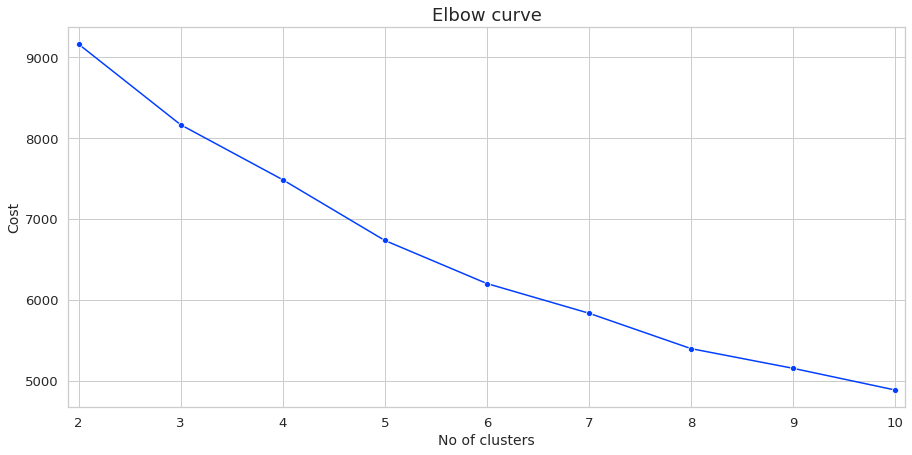

In [133]:
def plot_elbow_curve(start, end, data):
    no_of_clusters = list(range(start, end+1))
    cost_values = []
    
    for k in no_of_clusters:
        test_model = KPrototypes(n_clusters=k, init='Huang', random_state=42)
        test_model.fit_predict(data, categorical=categorical_index)
        cost_values.append(test_model.cost_)
        
    sns.set_theme(style="whitegrid", palette="bright", font_scale=1.2)
    
    plt.figure(figsize=(15, 7))
    ax = sns.lineplot(x=no_of_clusters, y=cost_values, marker="o", dashes=False)
    ax.set_title('Elbow curve', fontsize=18)
    ax.set_xlabel('No of clusters', fontsize=14)
    ax.set_ylabel('Cost', fontsize=14)
    ax.set(xlim=(start-0.1, end+0.1))
    plt.plot();
    
plot_elbow_curve(2,10,df_new)

## Clustering

In [134]:
model_3 = KPrototypes(n_clusters=3, init='Huang', random_state=42, n_jobs=-1)
model_3.fit_predict(smart_array, categorical=categorical_index)
print(model_3.cost_)
X['labels3'] = model_3.labels_

8166.323902803566


In [135]:
df_new['labels3'] = model_3.labels_
df_new.groupby('labels3').agg(['median' ,'mean']).T

labels3                                                   0         1  \
Edades                                     median  0.964662 -0.748665   
                                           mean    1.005834 -0.703377   
PQRS 2020                                  median -0.121377 -0.121377   
                                           mean   -0.077701 -0.091169   
PortalWeb 2020                             median -0.126568 -0.126568   
...                                                     ...       ...   
NivelEducativo_idSalud_PROFESIONAL         mean    0.017632  0.015679   
NivelEducativo_idSalud_TECNICA PROFESIONAL median  0.000000  0.000000   
                                           mean    0.015113  0.013937   
NivelEducativo_idSalud_TECNOLOGICA         median  0.000000  0.000000   
                                           mean    0.007557  0.012195   

labels3                                                   2  
Edades                                     median  0.334473  
                                           mean    0.152479  
PQRS 2020                                  median -0.121377  
                                           mean    2.868208  
PortalWeb 2020                             median -0.126568  
...                                                     ...  
NivelEducativo_idSalud_PROFESIONAL         mean    0.103448  
NivelEducativo_idSalud_TECNICA PROFESIONAL median  0.000000  
                                           mean    0.034483  
NivelEducativo_idSalud_TECNOLOGICA         median  0.000000  
                                           mean    0.000000  

[820 rows x 3 columns]

## Silueta

In [136]:
silhouette_score(smart_array, model_3.labels_, metric='euclidean')

0.12349596529881345

# DBSCAN con MixPCA

In [70]:
df_numerical = df_adhoc[['Edades','PQRS 2020',
       'PortalWeb 2020', 'APP 2020', 'CallCenter 2020',
       'OAA 2020', 'AsesorAClic 2020', 'ViveDigital 2020', 'IVR 2020',
       'ChatEnLinea']]

df_numerical['earning_by_age'] = np.where(df_numerical['Edades'] < 18, 0 , np.where((df_numerical['Edades'] >= 18) & (df_numerical['Edades'] < 30), 1000000, np.where((df_numerical['Edades'] >= 30) & (df_numerical['Edades'] < 40), 2000000, np.where((df_numerical['Edades'] >= 40) & (df_numerical['Edades'] < 50), 3000000, np.where((df_numerical['Edades'] >= 50) & (df_numerical['Edades'] < 60), 4000000, np.where((df_numerical['Edades'] >= 60) & (df_numerical['Edades'] < 70), 7000000, 1000000))))))

df_numerical.head()

scaler = StandardScaler()
df_numerical_scaled = scaler.fit_transform(df_numerical)
df_numerical_scaled = pd.DataFrame(df_numerical_scaled, columns=df_numerical.columns)
df_numerical_scaled.head()

df_categorical = df_adhoc[['Genero', 'TipoAfiliado', 'Regionales', 'Departamento',
       'Municipios', 'Zonas', 'REGIMEN', 'AfilidoPAC', 'Multiquejoso', 'mujerEnEdadFertil',
       'categoriaNivelDeDigitalizacionOficial', 'Condicion_Cronica_idSalud',
       'NivelRiesgo_idSalud', 'Discapacidad_idSalud', 'Etnia_idSalud',
       'NivelEducativo_idSalud']]
df_categorical.head()

df_new = pd.concat([df_numerical_scaled, df_categorical], axis=1)
df_new.head()

,Edades,PQRS 2020,PortalWeb 2020,APP 2020,CallCenter 2020,OAA 2020,AsesorAClic 2020,ViveDigital 2020,IVR 2020,ChatEnLinea,...,REGIMEN,AfilidoPAC,Multiquejoso,mujerEnEdadFertil,categoriaNivelDeDigitalizacionOficial,Condicion_Cronica_idSalud,NivelRiesgo_idSalud,Discapacidad_idSalud,Etnia_idSalud,NivelEducativo_idSalud
0,-1.527619,-0.104951,-0.15467,-0.131653,-0.214132,-0.307966,-0.030974,-0.026114,-0.195271,-0.142441,...,SUBSIDIADO,NO,NO,SI,MEDIO,SIN CONDICION,SIN CONDICION CRONICA,SIN DISCAPACIDAD,NINGUNA DE LAS ANTERIORES,NINGUNO
1,1.637643,-0.104951,-0.15467,-0.131653,-0.214132,0.570998,-0.030974,-0.026114,-0.195271,-0.142441,...,Contributivo,NO,NO,NO,MEDIO,CON CONDICION,GESTION BASICA,SIN DISCAPACIDAD,"NEGRO(A), MULATO(A), AFROCOLOMBIANO(A) O AFRO ...",BASICA SECUNDARIA
2,1.888854,-0.104951,-0.15467,-0.131653,-0.214132,0.570998,-0.030974,-0.026114,-0.195271,-0.142441,...,Contributivo,NO,NO,NO,MEDIO,CON CONDICION,GESTION DE ENFERMEDAD,SIN DISCAPACIDAD,NINGUNA DE LAS ANTERIORES,NINGUNO
3,1.788369,-0.104951,-0.15467,-0.131653,-0.214132,-0.307966,-0.030974,-0.026114,-0.195271,-0.142441,...,SUBSIDIADO,NO,NO,NO,MEDIO,SIN CONDICION,SIN CONDICION CRONICA,SIN DISCAPACIDAD,NINGUNA DE LAS ANTERIORES,NINGUNO
4,1.285947,-0.104951,-0.15467,-0.131653,-0.214132,-0.307966,-0.030974,-0.026114,-0.195271,-0.142441,...,Contributivo,NO,NO,NO,MEDIO,SIN CONDICION,SIN CONDICION CRONICA,SIN DISCAPACIDAD,NINGUNA DE LAS ANTERIORES,PROFESIONAL


In [71]:
famd = prince.FAMD(n_components=16,n_iter=5,copy=True,engine='auto',random_state=42)
df_new = df_new.dropna()
famd = famd.fit(df_new)
print('Inercia FAMD: ', sum(famd.explained_inertia_))
df_new_pca = famd.transform(df_new)
df_new_pca = pd.DataFrame(df_new_pca)
df_new_pca.columns = ['FAMD1','FAMD2','FAMD3','FAMD4','FAMD5','FAMD6','FAMD7','FAMD8', 'FAMD9','FAMD10','FAMD11','FAMD12','FAMD13','FAMD14','FAMD15','FAMD16']
df_new_pca.head()

Inercia FAMD:  0.058830075822326564


,FAMD1,FAMD2,FAMD3,FAMD4,FAMD5,FAMD6,FAMD7,FAMD8,FAMD9,FAMD10,FAMD11,FAMD12,FAMD13,FAMD14,FAMD15,FAMD16
0,-1.141984,0.755228,0.316026,-0.292565,0.406346,-0.420513,-0.496295,-0.317223,-0.005613,0.025502,-0.048745,0.182006,0.054722,0.286056,0.184109,0.418223
1,0.978918,-0.966494,-0.398299,-1.567088,-0.642896,0.449115,0.403404,0.103687,0.102191,0.227052,0.015620,0.008425,-0.039440,-0.328479,-0.084305,-0.002544
2,0.855745,-0.774384,-0.189854,-1.240259,-0.227693,0.485492,0.349315,-0.099280,0.118494,0.196995,0.163462,-0.168203,-0.041789,-0.408803,-0.004096,0.254637
3,0.068677,-0.783650,0.377368,0.460065,-1.519213,-0.995965,-0.286574,0.669605,-0.583543,0.218135,0.226012,0.205336,-0.334293,-0.962338,1.780328,0.218230
4,0.048844,-0.500746,0.057949,0.105618,0.207951,0.451579,-0.129198,-0.108491,0.290878,-0.059527,0.406758,0.368644,-0.280703,-0.376218,-0.132333,-0.344692


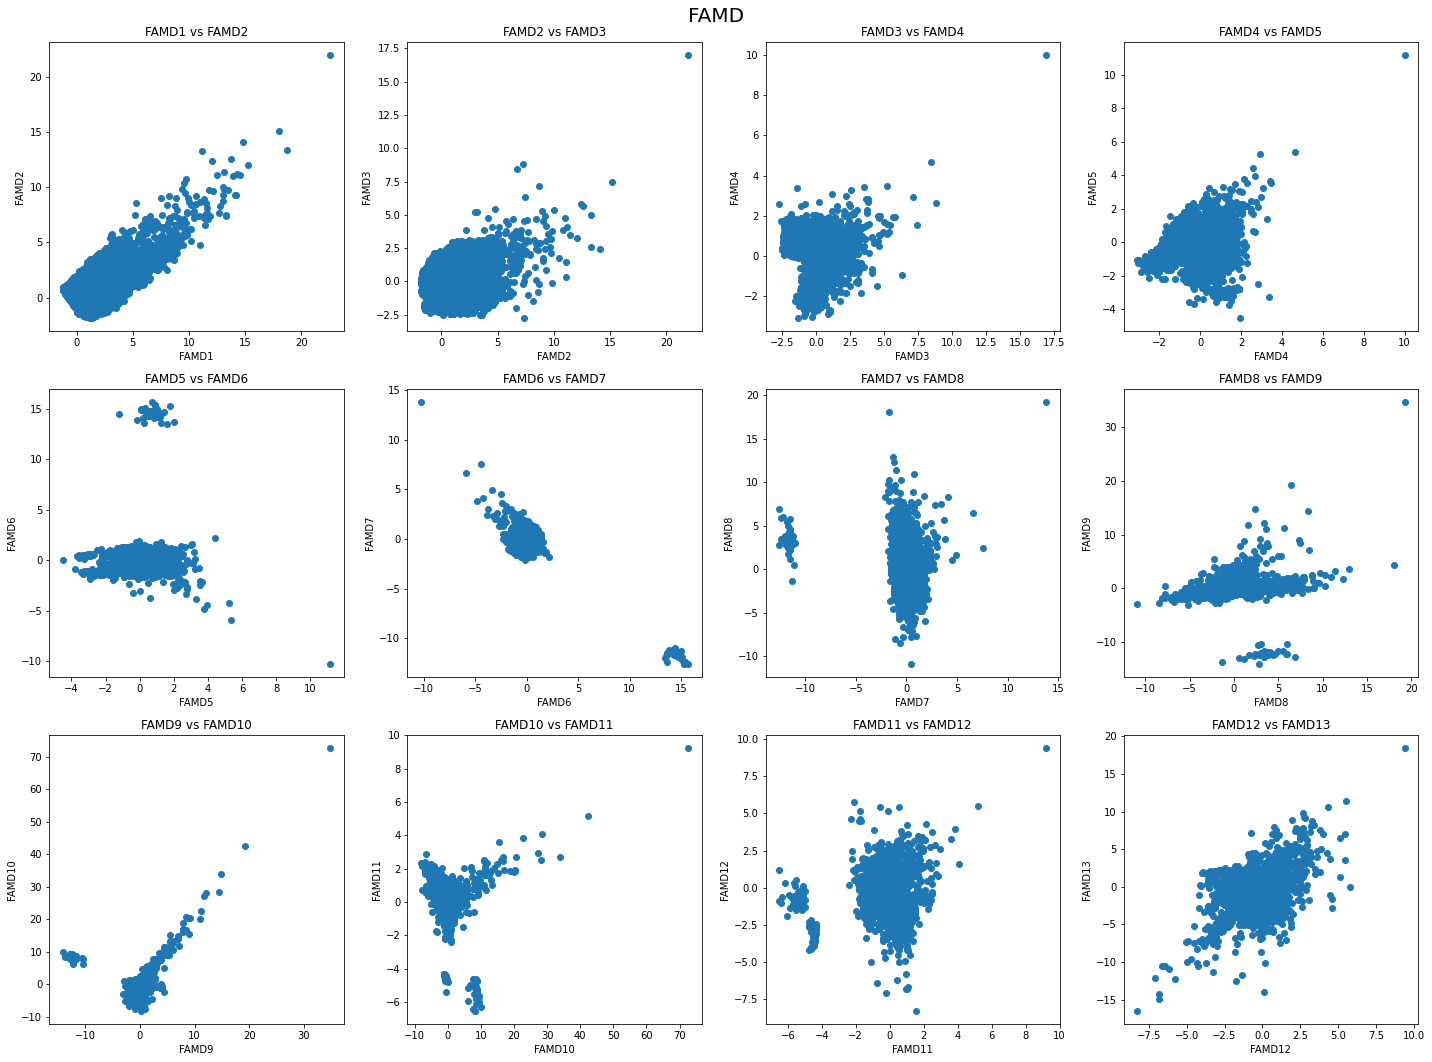

In [72]:
fig, axes = plt.subplots(3, 4, figsize=(20, 15))
fig.suptitle('FAMD', fontsize=20)

for i, ax in enumerate(axes.flatten()):
    ax.scatter(df_new_pca['FAMD'+str(i+1)], df_new_pca['FAMD'+str(i+2)])
    ax.set_xlabel('FAMD'+str(i+1))
    ax.set_ylabel('FAMD'+str(i+2))
    ax.set_title('FAMD'+str(i+1)+' vs FAMD'+str(i+2))


plt.tight_layout()
plt.show()

## Elbow

0.7354089579271433


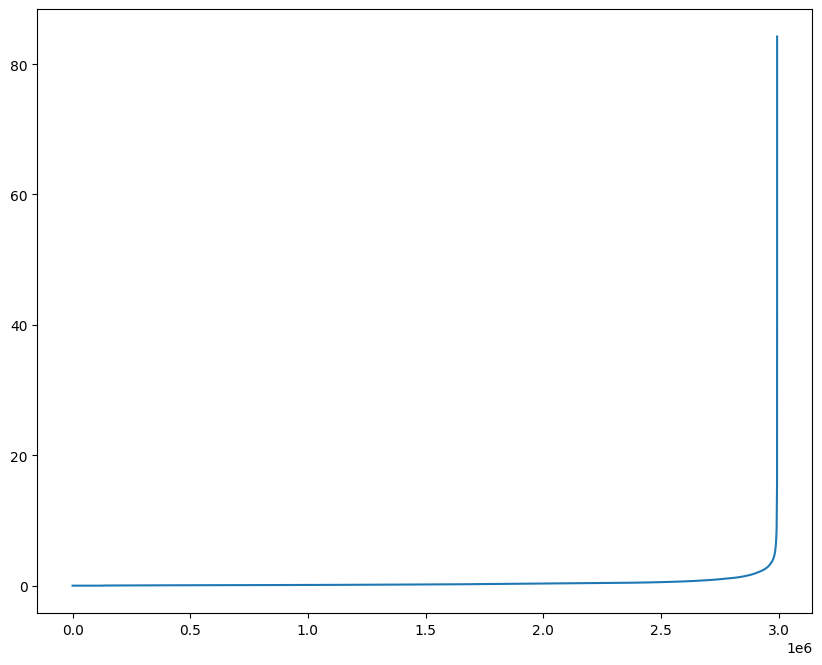

In [73]:
neigh = NearestNeighbors(n_neighbors = 40)
nbrs = neigh.fit(df_new_pca)
distancias, indices = nbrs.kneighbors(df_new_pca)
distancias = np.sort(distancias.flatten())
fig=plt.figure(figsize=(10,8), dpi= 100, facecolor='w', edgecolor='k')
plt.plot(distancias)

i = np.arange(len(distancias))
knee = KneeLocator(i, distancias, S=1, curve='convex', direction='increasing', interp_method='polynomial')
print(distancias[knee.knee])

In [74]:
db = DBSCAN(eps = distancias[knee.knee], min_samples=40)
clusters_std = db.fit_predict(df_new_pca)
print('Número de clusters: ', len(set(clusters_std)))

Número de clusters:  24


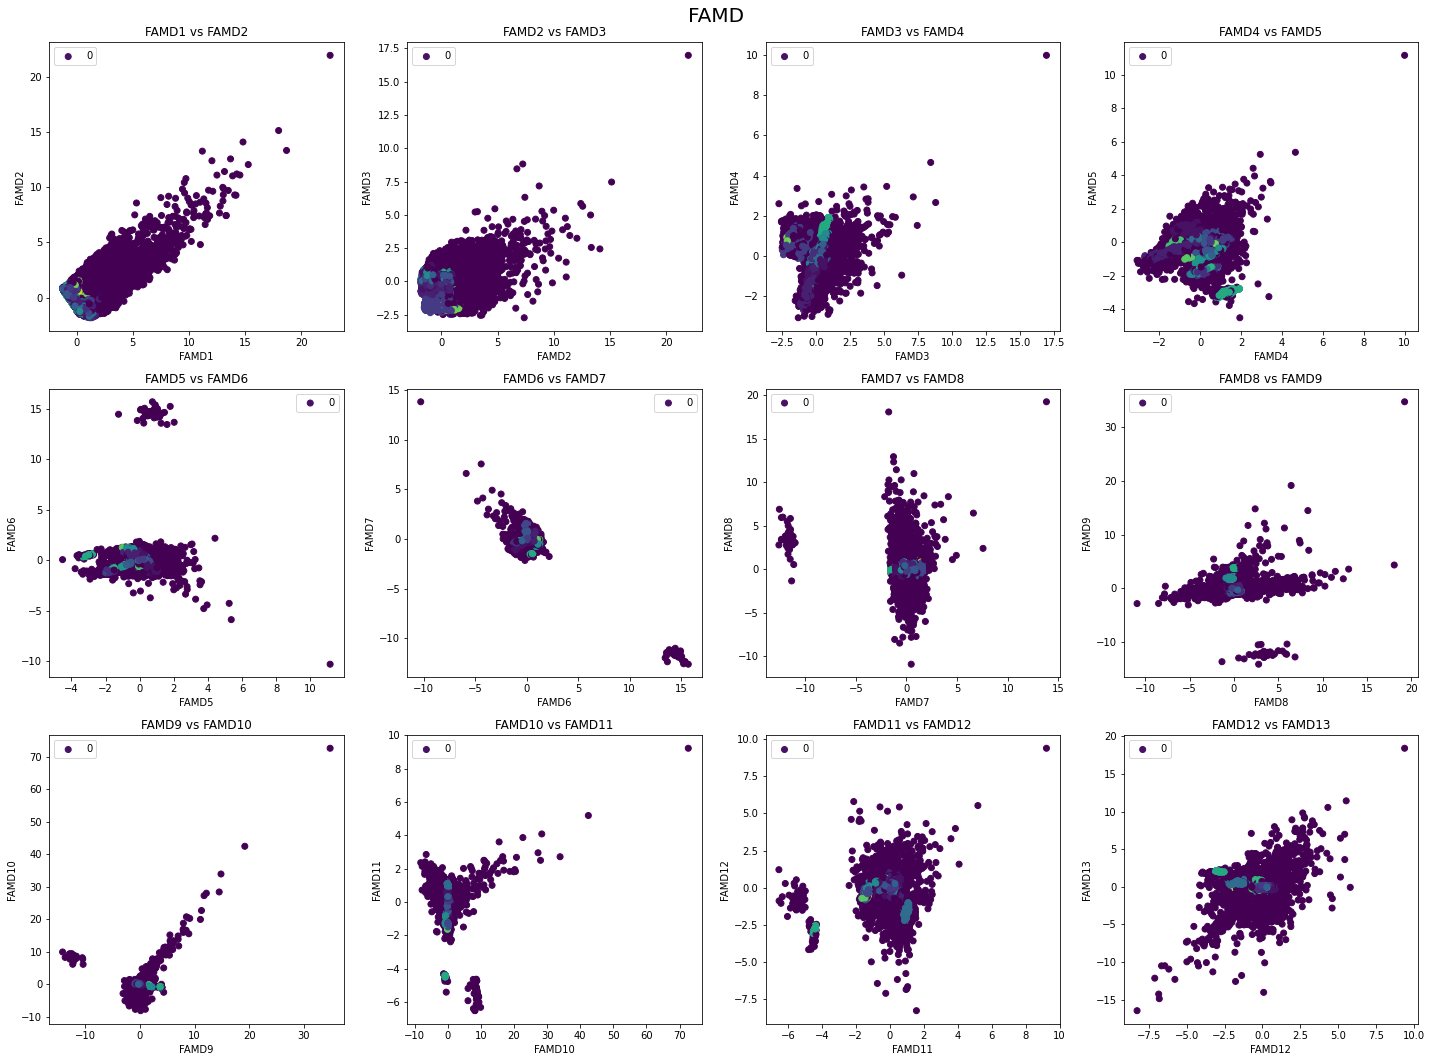

In [75]:
fig, axes = plt.subplots(3, 4, figsize=(20, 15))
fig.suptitle('FAMD', fontsize=20)

for i, ax in enumerate(axes.flatten()):
    ax.scatter(df_new_pca['FAMD'+str(i+1)], df_new_pca['FAMD'+str(i+2)], c=clusters_std)
    ax.set_xlabel('FAMD'+str(i+1))
    ax.set_ylabel('FAMD'+str(i+2))
    ax.set_title('FAMD'+str(i+1)+' vs FAMD'+str(i+2))
    ax.legend(clusters_std)


plt.tight_layout()
plt.show()

## Silueta

In [76]:
silhouette_score(df_new_pca, clusters_std, metric='euclidean')

0.027972442887798734